In [218]:
%matplotlib inline
from sklearn import linear_model

import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [18, 8]
plt.style.use('seaborn-colorblind')

The following will read the Application Server data and put in a Pandas dataframe.
Afterwards the data desciption file is opened and printed to the screen. This file is quite basic. A more detailed one can be found here: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names.

In [135]:
app_df = pd.read_csv("../app_server.csv")

In [136]:
f = open('../APP_README', 'r')
file_content = f.read()
print(file_content)
f.close()

DT    = Datetime
VPH   = Vistis per Hour
TPH   = Transactions per Hour
CPU   = CPU_Usage in %
MEM   = MEM_Usage in %
IO    = I/O in %

Number of Instances = 8760
Number of Features  = 6



In [137]:
print(app_df.head(5))
print("\nNumber of Instances = " + str(len(app_df)))

              DT    VPH    TPH   CPU   MEM    IO
0  1/1/2014 0:00  49299  17579  18.1  46.6  12.9
1  1/1/2014 1:00  28372   9092  16.6  37.9  14.1
2  1/1/2014 2:00   6528   2051  11.5  40.1  11.4
3  1/1/2014 3:00   1291    463  13.7  45.6  11.9
4  1/1/2014 4:00   4709   1588  18.8  45.0  15.1

Number of Instances = 8760


datetime64[ns]


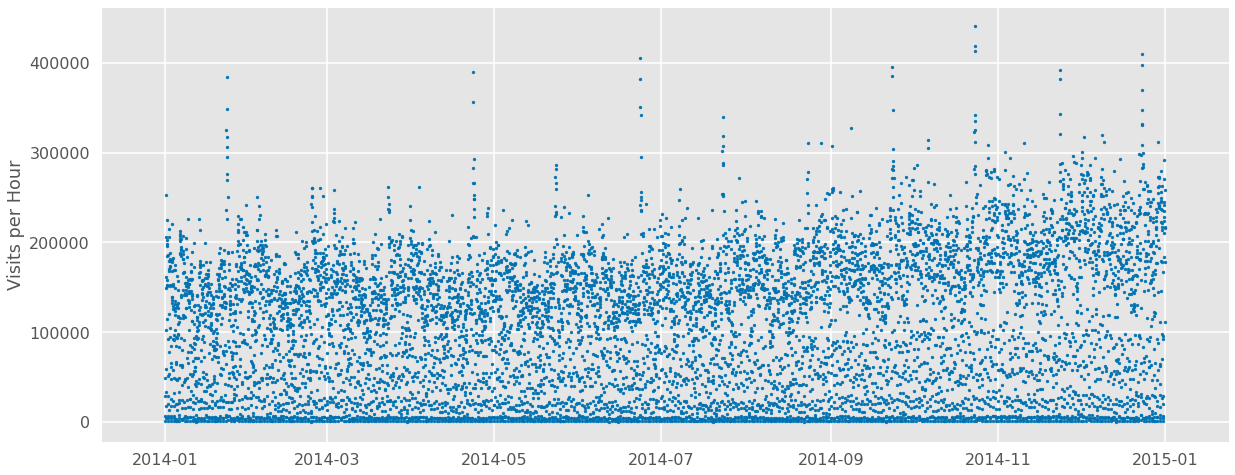

In [219]:
app_df['DT'] = pd.to_datetime(app_df['DT'], format="%m/%d/%Y %H:%M")
datetime = app_df['DT']
datetime = datetime.values.reshape(len(datetime), 1)
print(datetime.dtype)
vph = app_df['VPH']
vph = vph = vph.values.reshape(len(vph), 1)
plt.ylabel('Visits per Hour')
plt.scatter(datetime, vph, s=8)

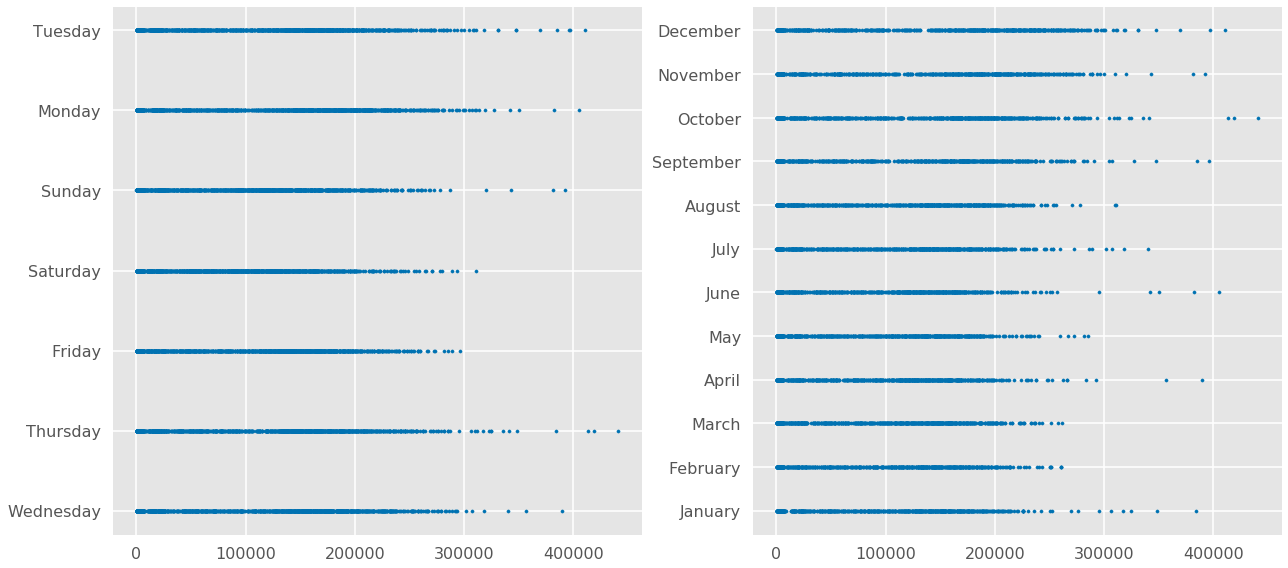

In [226]:
app_df['day_of_week'] = app_df['DT'].dt.day_name()
app_df['month_of_year'] = app_df['DT'].dt.month_name()
day_of_week = app_df['day_of_week']
month_of_year = app_df['month_of_year']
fig, ax = plt.subplots(1, 2)
ax[0].scatter(vph, day_of_week, s=10)
ax[1].scatter(vph, month_of_year, s=10)
fig.tight_layout()

In [196]:
cpu = app_df['CPU']
cpu = cpu.values.reshape(len(cpu), 1)
target = app_df['VPH']
target = target.values.reshape(len(target), 1)
cpu_train  = cpu[:-4380]
cpu_test = cpu[-4380:]
target_train = target[:-4380]
target_test = target[-4380:]

In [197]:
mem = app_df['MEM']
mem = mem.values.reshape(len(cpu), 1)
mem_train  = mem[:-4380]
mem_test = mem[-4380:]

In [198]:
regr_cpu = linear_model.LinearRegression()
regr_mem = linear_model.LinearRegression()

In [199]:
lm_cpu = regr_cpu.fit(cpu_train, target_train)
lm_mem = regr_mem.fit(mem_train, target_train)

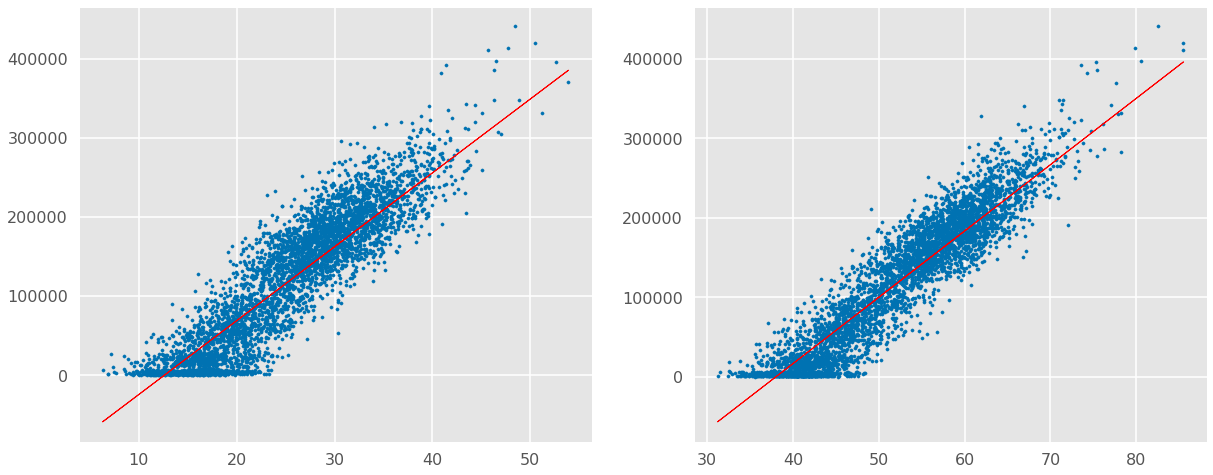

In [225]:
fig, ax = plt.subplots(1, 2)
ax[0].scatter(cpu_test, target_test, s = 10)
ax[0].plot(cpu_test, lm_cpu.predict(cpu_test), color='red', linewidth=1)
ax[1].scatter(mem_test, target_test, s = 10)
ax[1].plot(mem_test, lm_mem.predict(mem_test), color='red', linewidth=1)

In [171]:
model_cpu = sm.OLS(target, cpu).fit()
predictions_cpu = model_cpu.predict(X_app)
model_cpu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                 5.687e+04
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        12:47:57   Log-Likelihood:            -1.0702e+05
No. Observations:                8760   AIC:                         2.140e+05
Df Residuals:                    8759   BIC:                         2.141e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          4958.6508     20.793    238.477      0.000    4917.892    4999.410
==============================================================================
Omnibus:                      234.101   Durbin-Watson:                   0.410
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.893
Skew:                           0.224   Prob(JB):                     4.25e-36
Kurtosis:                       2.505   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [172]:
model_mem = sm.OLS(target, mem).fit()
predictions_mem = model_mem.predict(X_app)
model_mem.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                 3.475e+04
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        12:48:00   Log-Likelihood:            -1.0882e+05
No. Observations:                8760   AIC:                         2.176e+05
Df Residuals:                    8759   BIC:                         2.177e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2316.9718     12.428    186.424      0.000    2292.609    2341.335
==============================================================================
Omnibus:                      391.606   Durbin-Watson:                   0.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.309
Skew:                           0.227   Prob(JB):                     6.49e-48
Kurtosis:                       2.376   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""